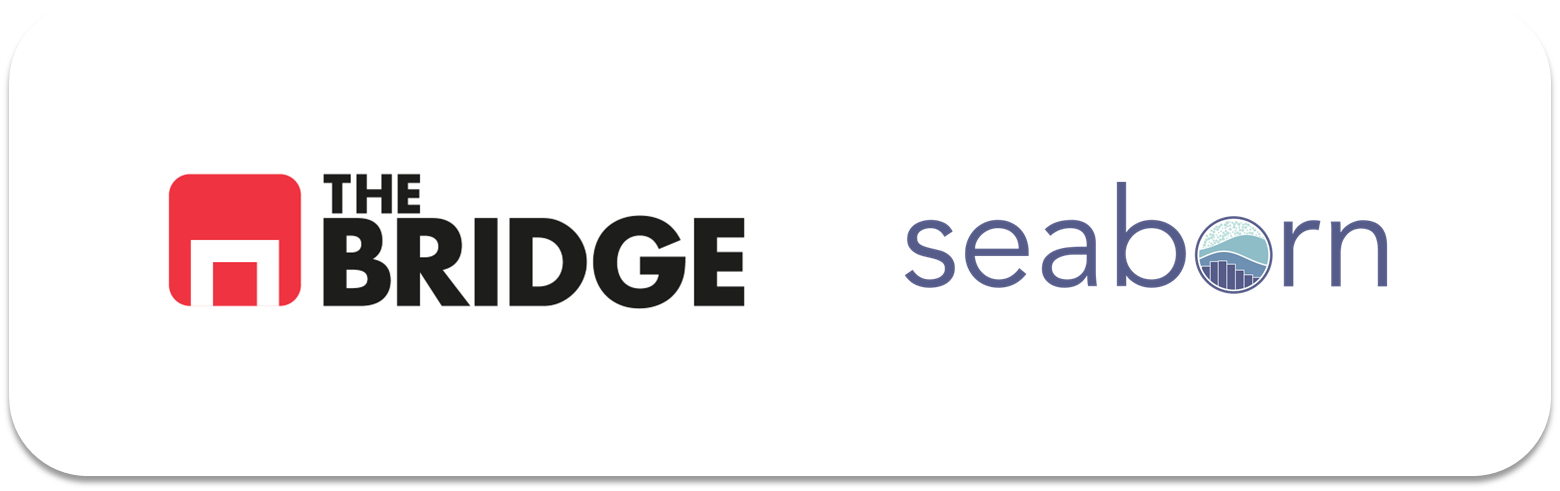

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import *

from scipy.stats import chi2_contingency, mannwhitneyu


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [14]:
df = pd.read_csv("./data/california_cities.csv")
df1 = df.dropna() # df.dropna(inplace=True)
df1.head(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [15]:
def funcion(df, columna_num_1, columna_num_2, columna_cat, valor, escala):
    if columna_num_1 == columna_num_2:
        print(f"Error, no puedo hacer gráfica de dispersión comparando la misma columna {columna_num_1}")
        return

    if columna_cat is None:
        # Caso: sin columna categórica
        valor_full = [0] * len(df)  # Inicializamos una lista de ceros

        # Iterar sobre los índices reales en lugar de posiciones
        for idx in df.index:
            if not pd.isna(df.at[idx, columna_num_1]):
                valor_full[idx] = valor[0] * (escala if escala else 1)
            if not pd.isna(df.at[idx, columna_num_2]):
                valor_full[idx] = valor[1] * (escala if escala else 1)

        plt.figure(figsize=(10, 5))
        sns.scatterplot(
            x=columna_num_1,
            y=columna_num_2,
            data=df,
            size=valor_full
        )
        plt.title(f"Dispersión: {columna_num_1} vs {columna_num_2}")
        plt.show()

    else:
        # Caso: con columna categórica
        plt.figure(figsize=(10, 5))
        sns.scatterplot(
            x=columna_num_1,
            y=columna_num_2,
            data=df,
            hue=columna_cat,
            size=(df["population_total"]*escala),
            sizes=(10,1000),
            legend=False
        )
        plt.title(f"Dispersión: {columna_num_1} vs {columna_num_2} por {columna_cat}")

    

    





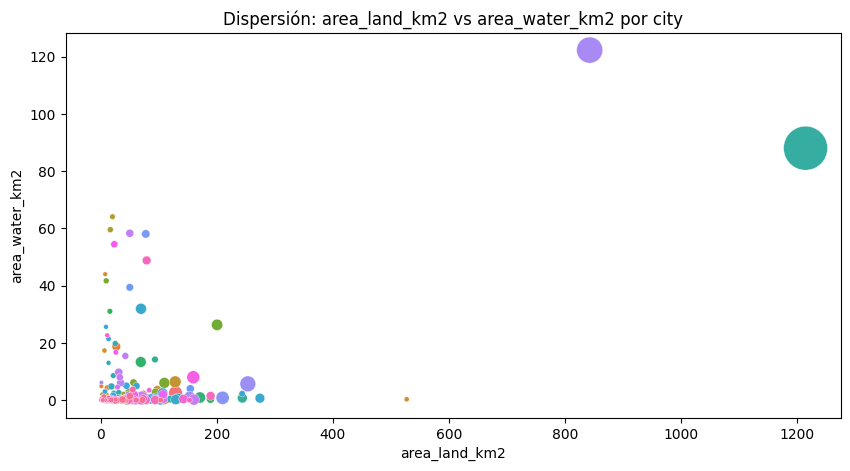

In [16]:
funcion(df1,"area_land_km2", "area_water_km2", "city", [10,5],10)

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

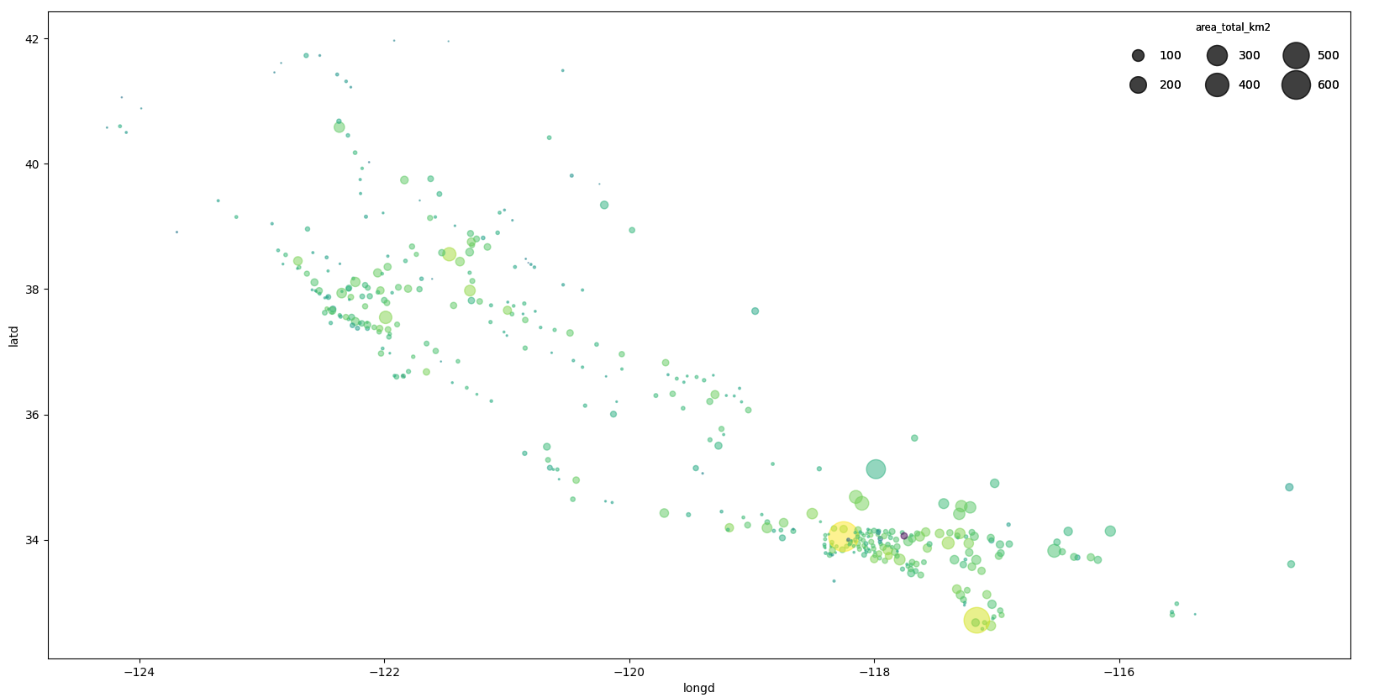

C:\Users\josel\AppData\Local\Temp\ipykernel_13704\1405736741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["log_poblacion"] = np.log10(df1["population_total"])


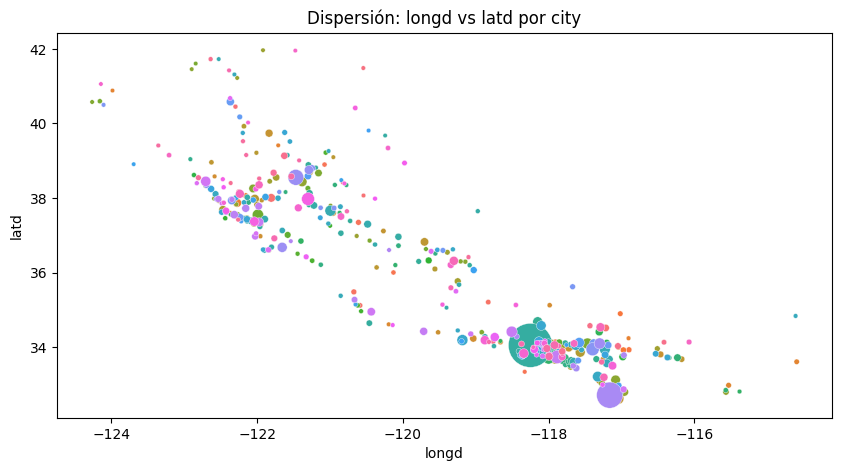

In [17]:
df1["log_poblacion"] = np.log10(df1["population_total"])

funcion(df1,"longd", "latd", "city", df1["area_total_km2"],1/100000)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [18]:
#preparamos el DataFrame
df_titanic = pd.read_csv("./data/titanic.csv")
#eliminamos columnas
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)
#feature engineering
df_titanic["family_members"] = df_titanic.parch + df_titanic.sibsp
df_titanic = df_titanic.drop(["parch","sibsp"], axis = 1)
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = df_titanic.embark_town.mode()[0]
#imputamos media a valores age personalizado
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"

media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man


In [19]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


#1- El titanic fue un accidente con una tasa de mortalidad alta.
#Estimaciones generales del índice de supervivencia:
1. Hundimientos de barcos de pasajeros (principios del siglo XX):
Rango de supervivencia: Entre 30% y 50%.
Ejemplos:
Titanic (1912): Supervivencia ≈ 31.7% (706 sobrevivientes de 2,224).
RMS Empress of Ireland (1914): Supervivencia ≈ 38% (465 sobrevivientes de 1,477).
RMS Lusitania (1915): Supervivencia ≈ 38.8% (761 sobrevivientes de 1,959).
2. Accidentes ferroviarios:
Los accidentes ferroviarios eran menos mortales que los desastres marítimos debido a que los pasajeros estaban en tierra firme y la evacuación era más factible.
Rango de supervivencia: Frecuentemente superior al 80%.
Ejemplo: Accidente ferroviario de Quintinshill (1915): Supervivencia ≈ 70% (226 fallecidos de 498 pasajeros).
3. Accidentes aéreos:
La aviación era incipiente en la época y los accidentes solían ser de alta mortalidad.
Rango de supervivencia: Por debajo del 20%, ya que la infraestructura de rescate y los sistemas de seguridad eran limitados.
fuente chatgpt


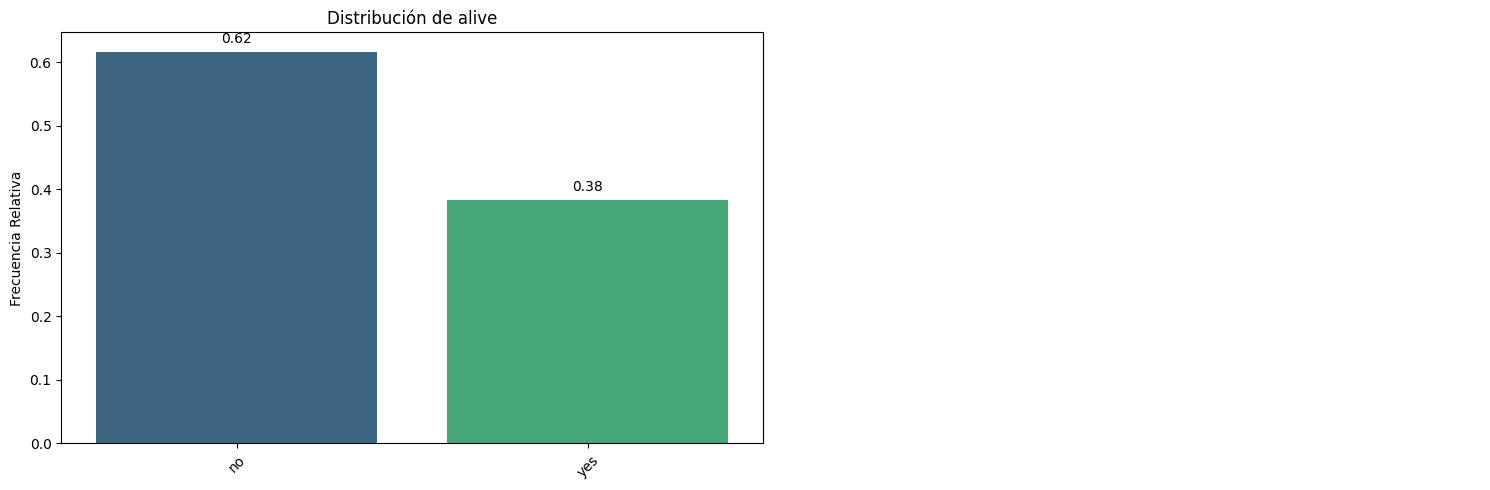

In [20]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  

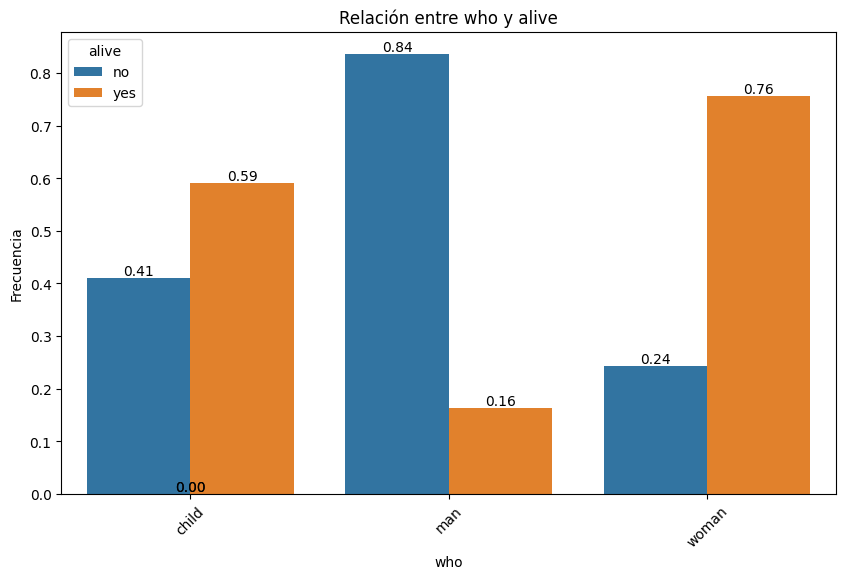

In [21]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq= True, show_values= True)

3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...

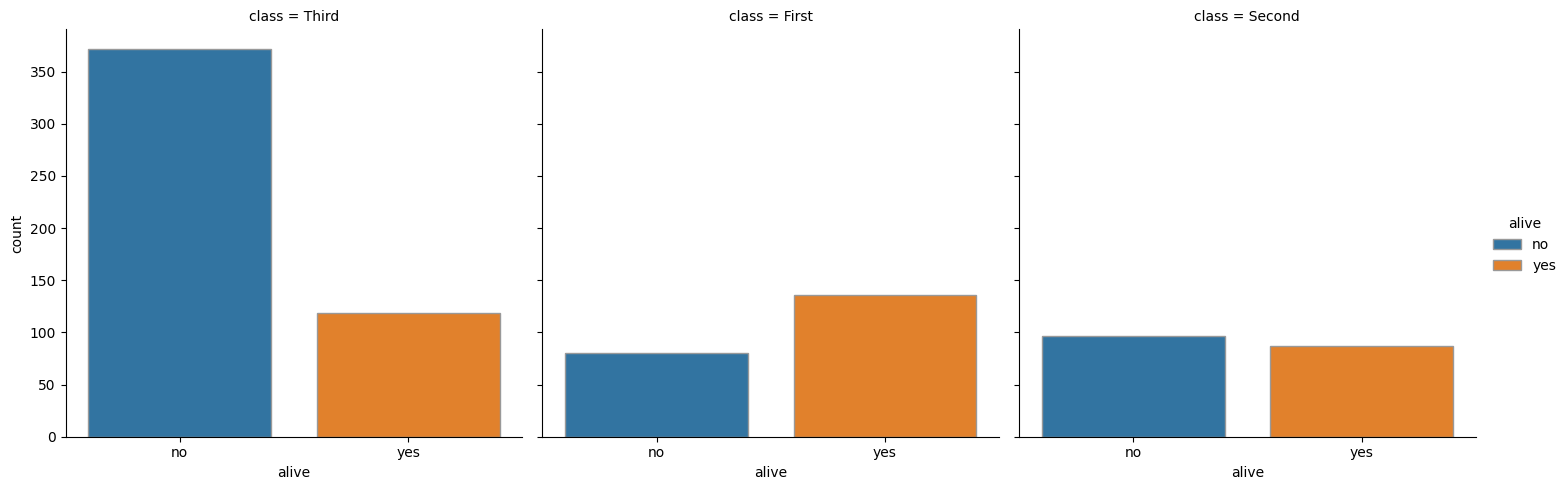

In [22]:
sns.catplot(x="alive",
            col="class",
            kind="count",
            edgecolor=".6",
            orient="V",
            hue="alive",
            legend=True,
            data=df_titanic);

4- ... las diferencias de tasas de supervivencia entre mujeres y niños. 

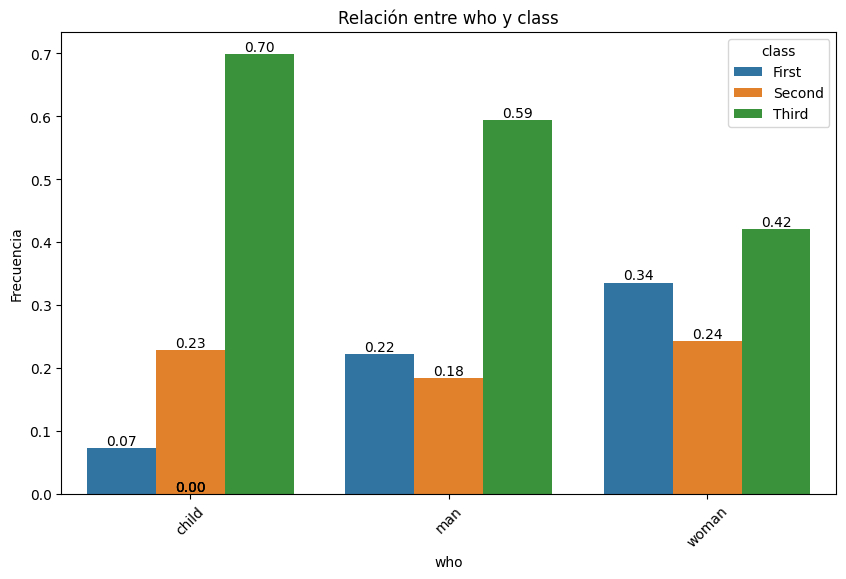

In [23]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)

5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

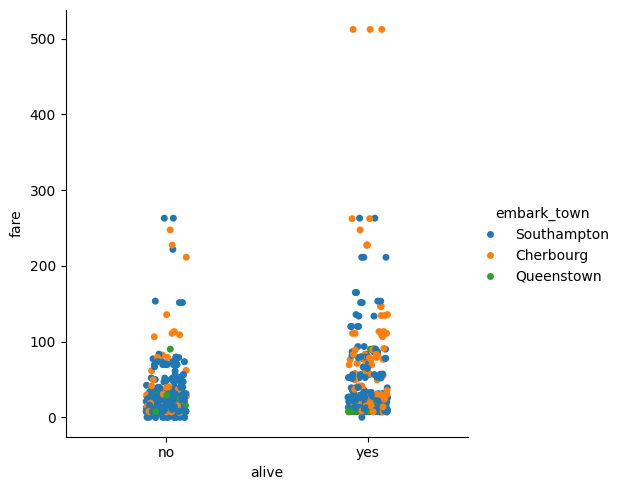

In [24]:
sns.catplot(x = "alive", y = "fare", hue = "embark_town", data = df_titanic, kind = "strip");